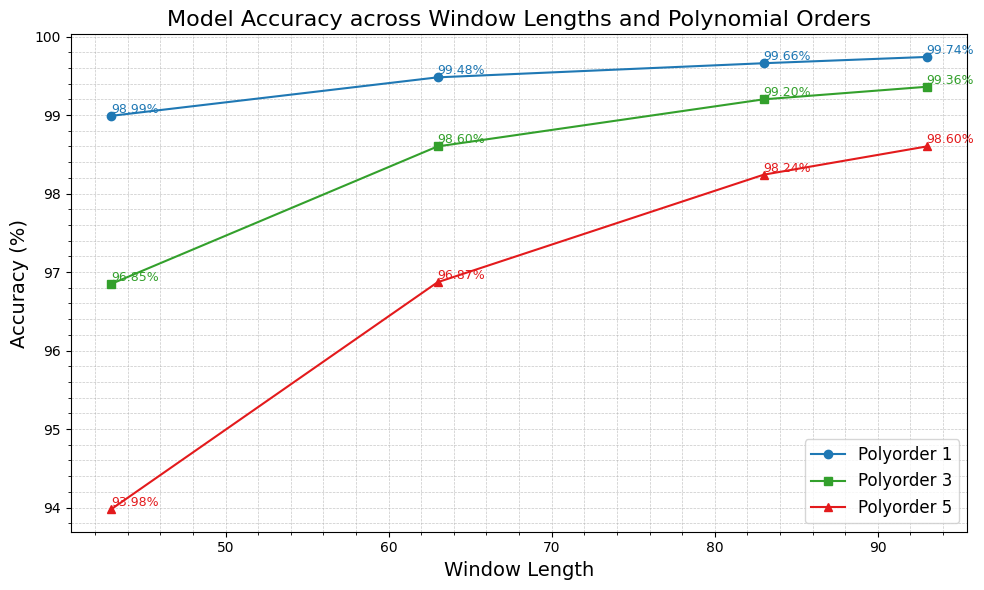

In [8]:
import matplotlib.pyplot as plt

# Data
window_lengths = [43, 63, 83, 93]
polyorders = [1, 3, 5]
accuracies = [
    [0.9899, 0.9948, 0.9966, 0.9974],  # polyorder = 1
    [0.9685, 0.9860, 0.9920, 0.9936],  # polyorder = 3
    [0.9398, 0.9687, 0.9824, 0.9860]   # polyorder = 5
]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Marker styles and colors
markers = ['o', 's', '^']
colors = ['#1f78b4', '#33a02c', '#e31a1c']  # Using colorbrewer2.org colors

for polyorder, accuracy, marker, color in zip(polyorders, accuracies, markers, colors):
    # Convert accuracy values to percentages
    accuracy_percentages = [acc * 100 for acc in accuracy]
    
    ax.plot(window_lengths, accuracy_percentages, label=f'Polyorder {polyorder}', marker=marker, color=color, linestyle='-')

    # Add accuracy values on the data points
    for x, y in zip(window_lengths, accuracy_percentages):
        ax.text(x, y, f'{y:.2f}%', ha='left', va='bottom', fontsize=9, color=color)

# Minor ticks
ax.minorticks_on()
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Title and labels with LaTeX-style font
ax.set_title('Model Accuracy across Window Lengths and Polynomial Orders', fontsize=16)
ax.set_xlabel('Window Length', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)

# Legend with larger font size
ax.legend(loc='lower right', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure (optional)
# plt.savefig('professional_plot_with_accuracy_percentage.png', dpi=300, bbox_inches='tight')

plt.show()


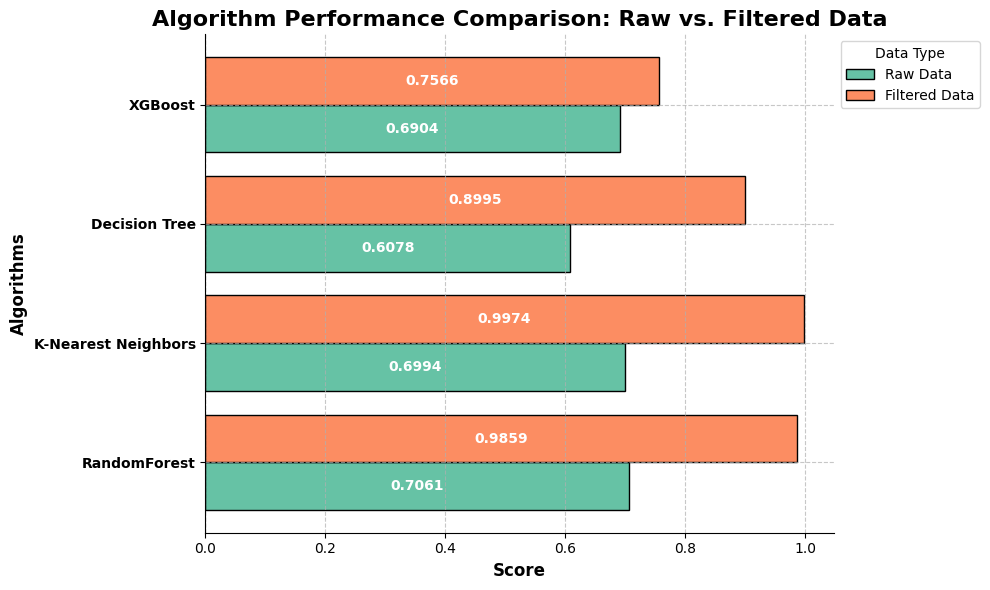

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a DataFrame from the provided data
data = {
    'Algorithms': ['RandomForest', 'K-Nearest Neighbors', 'Decision Tree', 'XGBoost'],
    'Raw Data': [0.7061, 0.6994, 0.6078, 0.6904],
    'Filtered Data': [0.9859, 0.9974, 0.8995, 0.7566]
}
df = pd.DataFrame(data)

# Setting the index to 'Algorithms' for easier plotting
df.set_index('Algorithms', inplace=True)

# Use a color palette for better aesthetics
colors = sns.color_palette('Set2')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Adjust the bar height to avoid overlapping
bar_height = 0.4
bar_positions_raw = range(len(df.index))
bar_positions_filtered = [pos + bar_height for pos in bar_positions_raw]

ax.barh(bar_positions_raw, df['Raw Data'], color=colors[0], height=bar_height, edgecolor='black', label='Raw Data')
ax.barh(bar_positions_filtered, df['Filtered Data'], color=colors[1], height=bar_height, edgecolor='black', label='Filtered Data')

# Add data labels inside each bar
for i, (raw, filtered) in enumerate(zip(df['Raw Data'], df['Filtered Data'])):
    ax.text(raw / 2, i, f'{raw:.4f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(filtered / 2, i + bar_height, f'{filtered:.4f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Add grid lines
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Title and labels
plt.title('Algorithm Performance Comparison: Raw vs. Filtered Data', fontsize=16, fontweight='bold')
plt.xlabel('Score', fontsize=12, fontweight='bold')
plt.ylabel('Algorithms', fontsize=12, fontweight='bold')

# Set y-axis tick positions and labels
tick_positions = [pos + bar_height / 2 for pos in bar_positions_raw]
plt.yticks(tick_positions, df.index, fontsize=10, fontweight='bold')

# Adjust legend placement for better visibility
plt.legend(title='Data Type', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a horizontal line for better separation
ax.axvline(x=0, color='black', linewidth=0.8, linestyle='--')

# Display the plot
plt.tight_layout()
plt.show()
